# Plotting MOF rates

### Loading modules

In [1]:
from matplotlib.pyplot import title,text,figure,show,plot,errorbar,subplots,xlabel,ylabel,subplots_adjust,savefig,gca,legend,xlim,ylim,annotate,locator_params
from matplotlib import rc
from numpy import loadtxt,arange,array,sqrt,linspace,append,nanmax
from mof_lattice import MOF_lattice,MOF_data,MOF
from os import listdir,getcwd,path,walk
from seaborn import color_palette,set_palette

In [2]:
color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
set_palette('colorblind')

In [4]:
%matplotlib notebook

#### Parameters
n: number of points <br/>
off: offset

In [5]:
n=100
off=0.0075

### Loading MOF calculated data

In [6]:
f=MOF("MOF_quench/20/")

### Temperature and chemical potential ranges

In [7]:
temp=linspace(f.path.min()-0.01,f.path.max()+0.01,n)
mu=f.mu*temp

### Calculating theoretical values

In [8]:
mof=MOF_lattice(f.length,f.E_s,f.E_m,f.E_t)
rho=mof.get_loading(mu,temp)

### Plotting the theoretical values

<IPython.core.display.Javascript object>


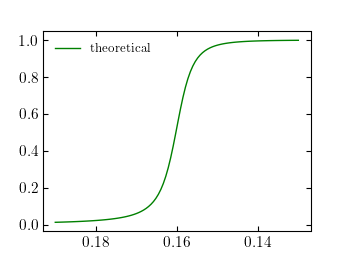

In [9]:
figure()
plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")
legend(frameon=False)
gca().invert_xaxis()
show()

### Folders to read

In [10]:
d=next(walk('.'))[1]
d=[a for a in d if a.isdigit()]
d=sorted(d,key=lambda x: int(x))

d=['10','11','12','13','15','20']
d=d[::-1]
b=[]
for a in d:
    b+=['MOF_quench/'+a]
d=b
print(d)

['MOF_quench/20', 'MOF_quench/15', 'MOF_quench/13', 'MOF_quench/12', 'MOF_quench/11', 'MOF_quench/10']


### Reading and plotting MOF data with various temperature ramp rates

<IPython.core.display.Javascript object>


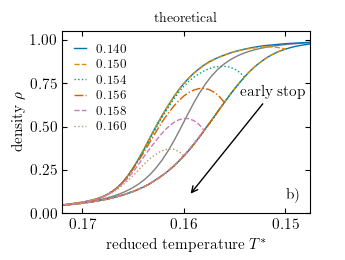

In [11]:
#plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")
fig,ax=subplots()

plot(temp,rho,alpha=0.5,color='k',linewidth=1.0)

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['-', '--', ':','-.','--',':'])

for a in d:
    f=MOF(a)
    #errorbar(f.path,f.rho.mean,yerr=sqrt(f.rho.var),linewidth=1.00,elinewidth=6.00,ecolor="y",barsabove=True,color="r",alpha=0.66)
    #ax1.vlines(f.path,ymin=f.rho.min,ymax=f.rho.max,linewidth=0.66,alpha=1.0)
    
    #l=float(f.isobar[0])/80.0*100
    t=(int(len(f.path)/2))
    l=(f.path[t-1])
    
    plot(f.path,f.rho.mean,
         #markersize=1.0,
         linewidth=1.0,
         #alpha=1.0,
         #label="$T^*={:.3f}$".format(l))
         label=r"${:.3f}$".format(l))

annotate(r"early stop",xy=(0.1595,0.1),xytext=(0.1545,0.7),
         arrowprops=dict(arrowstyle="->"),textcoords='data',va='center')

annotate(r"b)",xytext=(0.9,0.1),xy=(0.15,0.15),xycoords='axes fraction',va='center')
title(r"theoretical",fontsize=10)

legend(frameon=False,loc=2,handlelength=1,labelspacing=0.2)
xlim(f.path.min()+off,f.path.max()-off)
xlim(0.1475,0.172)
ylim(0,1.05)

gca().invert_xaxis()

xlabel(r"reduced temperature $T^*$")
ylabel(r"density $\rho$")

ax.xaxis.major.locator.set_params(nbins=3) 

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_quench.png")
savefig("mof_quench.pdf")

show()

In [14]:
import pandas as pd

In [15]:
xl_file=pd.ExcelFile('e-2-Mg2dobpdc_hysteresis-tests_final.xlsx')

In [16]:
print(xl_file.sheet_names)

['quench', 'rates', 'bare-Mg2dobpdc', 'e-2-Mg2dobpdc']


#### Read columns fce

In [17]:
def read_columns(a=[0,1],b=[4,5]):
    a1=pd.read_excel(xl_file,sheet_name='quench',usecols=a,header=8)
    a2=pd.read_excel(xl_file,sheet_name='quench',usecols=b,header=8)

    T1,rho1=a1.values.transpose()
    T2,rho2=a2.values.transpose()
    
    T=append(T1,T2)
    rho=append(rho1,rho2)
    
    return T,rho

In [19]:
_T=[]
_rho=[]
k=2
cols=[
    {'a':[0,1+k],'b':[4,5+k]},
    {'a':[32,33+k],'b':[36,37+k]},
    {'a':[24,25+k],'b':[28,29+k]},
    {'a':[16,17+k],'b':[20,21+k]},
    {'a':[8,9+k],'b':[12,13+k]}  
     ]
for a in cols:
    T,rho=read_columns(a=a['a'],b=a['b'])
    _T+=[T]
    _rho+=[rho]

#### Reading data

<IPython.core.display.Javascript object>


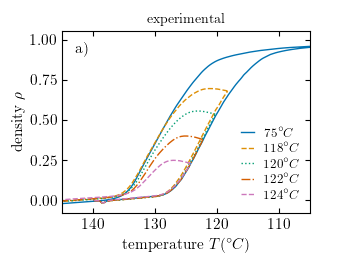

In [20]:
fig,ax=subplots()

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['-', '--', ':','-.','--',':'])

labels=['75','118','120','122','124']

for T,rho,label in zip(_T,_rho,labels):
    ax.plot(T,rho,
         linewidth=1.0,
         label=label+"${^\circ}C$")

legend(frameon=False,loc=4,handlelength=1,labelspacing=0.2)
xlim(105,145)

annotate(r"a)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center')

title(r"experimental",fontsize=10)

gca().invert_xaxis()

xlabel(r"temperature $T(^\circ C)$")
ylabel(r"density $\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_quench_exp.png")
savefig("mof_quench_exp.pdf")
    
show()

# Plotting MOF rates

#### Parameters

n: number of points <br/>
off: offset

In [35]:
from matplotlib.pyplot import figure,show,plot,errorbar,subplots,xlabel,ylabel,subplots_adjust,savefig,gca,legend,xlim,annotate
from matplotlib import rc
from numpy import loadtxt,arange,array,sqrt,linspace,append,nanmax,log
from mof_lattice import MOF_lattice,MOF_data,MOF
from os import listdir,getcwd,path,walk
from seaborn import color_palette,set_palette

In [36]:
n=100
off=0.003

### Loading MOF calculated data

In [61]:
f=MOF("MOF_rates/12800/")

### Temperature and chemical potential ranges

In [62]:
temp=linspace(f.path.min()-0.01,f.path.max()+0.01,n)
mu=f.mu*temp

### Calculating theoretical values

In [63]:
mof=MOF_lattice(f.length,f.E_s,f.E_m,f.E_t)
rho=mof.get_loading(mu,temp)
corr_length=mof.correlation_length(mu,temp)

In [64]:
hess=mof.hessian(mu,temp)

# Calculating correlation length

### Relaxation time calculation

fit with $1-\exp^{-t/\tau}$ 

In [65]:
def fn(x):
    return (x-x[0])/(x[-1]-x[0])

In [66]:
def fexp(x,a):
    from numpy import exp
    return exp(-x/a)

(160, 2000)


/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


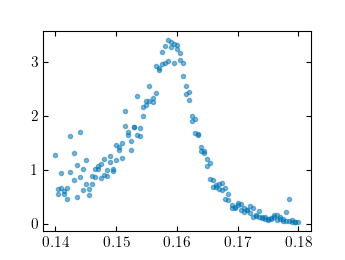

In [67]:
from scipy.optimize import curve_fit

data=loadtxt('MOF_rates/12800/npart.dat')
time=loadtxt('MOF_rates/12800/time.dat')

m=MOF('MOF_rates/12800/')

print(data.shape)

c=[]
for x,t in zip(data,time):
    f=fn(x)
    ff=1-f

    popt, pcov = curve_fit(fexp,t,ff,p0=1e8)
    c+=[popt]
c=array(c)
figure()
plot(m.path,c/1e8,'.',alpha=0.5)

<IPython.core.display.Javascript object>


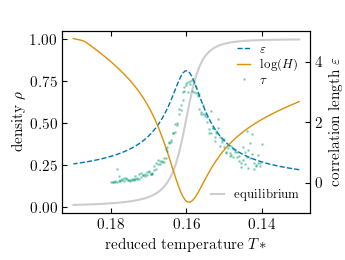

[0.1795 0.179  0.1785 0.178  0.1775 0.177  0.1765 0.176  0.1755 0.175
 0.1745 0.174  0.1735 0.173  0.1725 0.172  0.1715 0.171  0.1705 0.17
 0.1695 0.169  0.1685 0.168  0.1675 0.167  0.1665 0.166  0.1655 0.165
 0.1645 0.164  0.1635 0.163  0.1625 0.162  0.1615 0.161  0.1605 0.16
 0.1595 0.159  0.1585 0.158  0.1575 0.157  0.1565 0.156  0.1555 0.155
 0.1545 0.154  0.1535 0.153  0.1525 0.152  0.1515 0.151  0.1505 0.15
 0.1495 0.149  0.1485 0.148  0.1475 0.147  0.1465 0.146  0.1455 0.145
 0.1445 0.144  0.1435 0.143  0.1425 0.142  0.1415 0.141  0.1405 0.14
 0.1405 0.141  0.1415 0.142  0.1425 0.143  0.1435 0.144  0.1445 0.145
 0.1455 0.146  0.1465 0.147  0.1475 0.148  0.1485 0.149  0.1495 0.15
 0.1505 0.151  0.1515 0.152  0.1525 0.153  0.1535 0.154  0.1545 0.155
 0.1555 0.156  0.1565 0.157  0.1575 0.158  0.1585 0.159  0.1595 0.16
 0.1605 0.161  0.1615 0.162  0.1625 0.163  0.1635 0.164  0.1645 0.165
 0.1655 0.166  0.1665 0.167  0.1675 0.168  0.1685 0.169  0.1695 0.17
 0.1705 0.171  0.1715 0.172

In [75]:
%matplotlib notebook

fig,ax1=subplots()

ax1.plot(temp,rho,'k-',alpha=0.2,linewidth=1.5,label=r"equilibrium")
legend(frameon=False,loc=4,handlelength=1,labelspacing=0.2)

ylabel(r"density $\rho$")
xlabel(r"reduced temperature $T*$")

ax2=ax1.twinx()

ax2.plot(temp,corr_length,'--',linewidth=1.0,label=r"$\varepsilon$")

ax2.plot(temp,log(hess),linewidth=1.0,label=r"$\log(H)$")
ax2.plot(m.path,c/1e8,'.',alpha=0.33,markersize=2.0,label=r"$\tau$")

print(m.path)

ax2.set_ylim(-1,5)

legend(frameon=False,loc=1,handlelength=1,labelspacing=0.2)
ax1.invert_xaxis()

xlabel(r"reduced temperature $T^{*}$")
ylabel(r"correlation length $\varepsilon$")

subplots_adjust(left=0.18,bottom=0.18)

savefig('fluctuations.pdf')
savefig('fluctuations.png')

show()

### Plotting the theoretical values

<IPython.core.display.Javascript object>


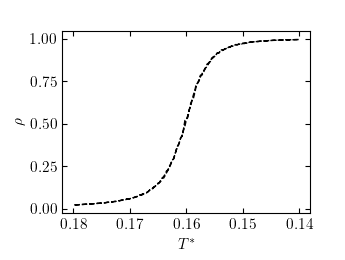

In [51]:
figure()

f=MOF('MOF_rates/12800c/')
plot(f.path,f.rho.mean,'k--',linewidth=1.0)

xlabel(r"$T^*$")
ylabel(r"$\rho$")

subplots_adjust(left=0.18,bottom=0.18)
gca().invert_xaxis()

### Test fit

(320, 2000)


<IPython.core.display.Javascript object>


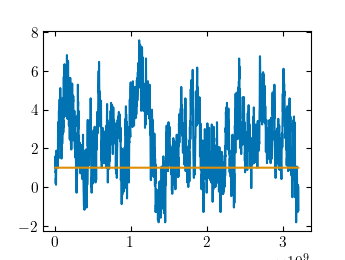

[3.6641983e+16]


In [52]:
from scipy.optimize import curve_fit

data=loadtxt('MOF_rates/12800c/npart.dat')
time=loadtxt('MOF_rates/12800c/time.dat')

print(data.shape)

figure()
x=data[41]
t=time[41]

f=fn(x)
ff=1-f

popt, pcov = curve_fit(fexp,t,ff,p0=1e8)
print(popt)

plot(t,ff,'-')
plot(t,fexp(t,*popt))

## Images

In [46]:
d1=loadtxt('MOF_snapshot/1/snapsh.dat')
d2=loadtxt('MOF_snapshot/2/snapsh.dat')
d3=loadtxt('MOF_snapshot/3/snapsh.dat')
print(d1)
print(d1.shape)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 2. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 2. ... 1. 1. 2.]
 [1. 1. 1. ... 1. 1. 1.]]
(6400, 4096)


<IPython.core.display.Javascript object>


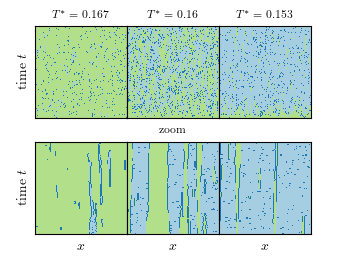

In [47]:
from matplotlib.pyplot import imshow
from   matplotlib.colors import ListedColormap

color=color_palette('colorblind',4)
cmap=ListedColormap(['#b2df8a','#b2df8a','#a6cee3','#1f78b4'],name='my_map',N=4)
#cmap=ListedColormap(color,name='my_map',N=4)

fig,ax=subplots(2,3,figsize=(3.45,2.6))

la=4096
lb=128

ax[0,0].imshow(d3[0:la,:],interpolation="None",cmap=cmap,origin="lower",vmin=1,vmax=4)

ax[0,0].set_title(r"$T^*=0.167$",fontsize=8)
ax[0,0].set_ylabel(r"time $t$",fontsize=10)
#ax[0,0].set_xlabel(r"$x$",fontsize=10)

ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

ax[0,1].imshow(d1[:la,:],interpolation="None",cmap=cmap,origin="lower",vmin=1,vmax=4)

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_title(r"$T^*=0.16$",fontsize=8)
#ax[0,1].set_xlabel(r"$x$",fontsize=10)

ax[0,2].imshow(d2[:la,:],interpolation="None",cmap=cmap,origin="lower",vmin=1,vmax=4)

ax[0,2].set_xticks([])
ax[0,2].set_yticks([])
ax[0,2].set_title(r"$T^{*}=0.153$",fontsize=8)
a#x[0,2].set_xlabel(r"$x$",fontsize=10)

###

t0=10
t1=t0+1

ax[1,0].imshow(d3[t0*lb:t1*lb,:lb],interpolation="None",cmap=cmap,origin="lower",vmin=1,vmax=4)

#ax[1,0].set_title(r"$T^*=0.167$",fontsize=8)
ax[1,0].set_ylabel(r"time $t$",fontsize=10)
ax[1,0].set_xlabel(r"$x$",fontsize=10)

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

ax[1,1].imshow(d1[t0*lb:t1*lb,:lb],interpolation="None",cmap=cmap,origin="lower",vmin=1,vmax=4)

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,1].set_title(r"zoom",fontsize=8)
ax[1,1].set_xlabel(r"$x$",fontsize=10)

ax[1,2].imshow(d2[t0*lb:t1*lb,:lb],interpolation="None",cmap=cmap,origin="lower",vmin=1,vmax=4)

ax[1,2].set_xticks([])
ax[1,2].set_yticks([])
#ax[1,2].set_title(r"$T^{*}=0.153$",fontsize=8)
ax[1,2].set_xlabel(r"$x$",fontsize=10)

subplots_adjust(wspace=0.0,hspace=0.25,left=0.1,bottom=0.1,top=0.9,right=0.9)

savefig("evolution.pdf")
savefig("evolution.png")

#### Folders to read

In [48]:
d=next(walk('MOF_rates'))[1]

d=['100','200','400']
b=[]
for a in d:
    b+=['MOF_rates/'+a]
d=b
print(d)

['MOF_rates/100', 'MOF_rates/200', 'MOF_rates/400']


## Reading and plotting MOF data with various temperature ramp rates

<IPython.core.display.Javascript object>


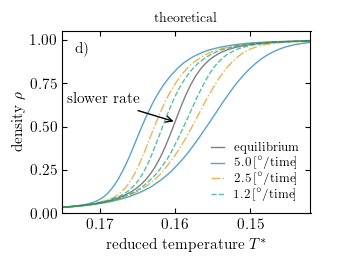

In [49]:
fig,ax=subplots()

plot(temp,rho,'k-',linewidth=1.0,alpha=0.5,label=r"equilibrium")

#ax.set_prop_cycle(color=color_palette('colorblind',3),linestyle=['--', ':', '-.'])
ax.set_prop_cycle(color=color_palette('colorblind',3),linestyle=['-','-.','--'])

for a in d:
    f=MOF(a)
    #errorbar(f.path,f.rho.mean,yerr=sqrt(f.rho.var),linewidth=1.00,elinewidth=6.00,ecolor="y",barsabove=True,color="r",alpha=0.66)
    #ax1.vlines(f.path,ymin=f.rho.min,ymax=f.rho.max,linewidth=0.66,alpha=1.0)
    plot(f.path,f.rho.mean,
         linewidth=1.0,
         markersize=1.0,
         alpha=0.66,
         label=r"$%.1lf\,[^\circ/\mathrm{time}]$"%(1e6*0.0005/(float(a[-3:]))))

annotate(r"slower rate",xy=(0.46,0.5),xytext=(0.02,.6),arrowprops=dict(arrowstyle="->"),xycoords='axes fraction')
annotate(r"d)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center')

title(r"theoretical",fontsize=10)

legend(frameon=False,loc=4,handlelength=1,labelspacing=0.2)
xlim(f.path.min()+off,f.path.max()-off)
ylim(0,1.05)
xlim(0.142,0.175)

gca().invert_xaxis()

ax.xaxis.major.locator.set_params(nbins=4) 

xlabel(r"reduced temperature $T^*$")
ylabel(r"density $\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_rates.png")
savefig("mof_rates.pdf")

show()

In [34]:
import pandas as pd

In [35]:
xl_file=pd.ExcelFile('e-2-Mg2dobpdc_hysteresis-tests_final.xlsx')

In [36]:
print(xl_file.sheet_names)

['quench', 'rates', 'bare-Mg2dobpdc', 'e-2-Mg2dobpdc']


## Read columns fce

In [37]:
def read_columns(a=[0,1],b=[4,5]):
    a1=pd.read_excel(xl_file,sheet_name='rates',usecols=a,header=8)
    a2=pd.read_excel(xl_file,sheet_name='rates',usecols=b,header=8)

    T1,rho1=a1.values.transpose()
    T2,rho2=a2.values.transpose()
    
    T=append(T1,T2)
    rho=append(rho1,rho2)
    
    return T,rho

In [38]:
_T=[]
_rho=[]
cols=[
    {'a':[24,25],'b':[28,29]},
    {'a':[16,17],'b':[20,21]},
    {'a':[0,1],'b':[4,5]},    
    {'a':[8,9],'b':[12,13]}  
     ]
for a in cols:
    T,rho=read_columns(a=a['a'],b=a['b'])
    _T+=[T]
    _rho+=[rho]

## Plotting experimental data

<IPython.core.display.Javascript object>


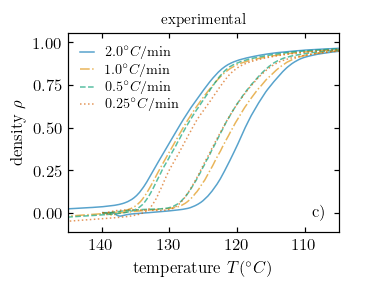

In [39]:
fig,ax=subplots()

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['-','-.','--',':',':',':'])

labels=['0.25','0.5','1.0','2.0']

for T,rho,label in zip(_T[::-1],_rho[::-1],labels[::-1]):
    m=(nanmax(rho))
    plot(T,rho/m,
         linewidth=1.0,
         alpha=0.66,
         label=label+"${^\circ}C/$min")

legend(frameon=False,loc=2,handlelength=1,labelspacing=0.2)


#annotate(r"c)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center')
annotate(r"c)",xytext=(0.9,0.1),xy=(0.15,0.15),xycoords='axes fraction',va='center')

title(r"experimental",fontsize=10)

gca().invert_xaxis()

xlabel(r"temperature $T(^\circ C)$")
ylabel(r"density $\rho$")

xlim(145,105)

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_rates_exp.png")
savefig("mof_rates_exp.pdf")
    
show()

## Schematics

<IPython.core.display.Javascript object>


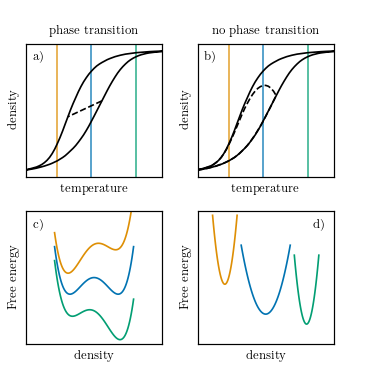

In [87]:
from numpy import take
a=color_palette('colorblind')

fig,ax=subplots(2,2,figsize=(3.4,3.4))

f0=MOF('MOF_quench/20/')
f1=MOF('MOF_quench/12/')

lw=1.11

ax[0,1].axvline(0.165,0,1,linewidth=lw,color=a[1],alpha=0.77)
ax[0,1].axvline(0.1585,0,1,linewidth=lw,color=a[0],alpha=0.77)
ax[0,1].axvline(0.15,0,1,linewidth=lw,color=a[2],alpha=0.77)

ax[0,1].plot(f1.path,f1.rho.mean,'k--',linewidth=lw)
ax[0,1].plot(f0.path,f0.rho.mean,'k-',linewidth=lw)

ax[0,1].set_xlim(0.171,0.145)
ax[0,1].set_ylim(0,1.05)
ax[0,1].set_title(r"no phase transition",fontsize=8)
ax[0,1].set_ylabel(r"density",fontsize=8)
ax[0,1].set_xlabel(r"temperature",fontsize=8)

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])

fx=take(f0.path,[46,125])
fy=take(f0.rho.mean,[46,125])

ax[0,0].axvline(0.165,0,1,linewidth=lw,color=a[1],alpha=0.77)
ax[0,0].axvline(0.1585,0,1,linewidth=lw,color=a[0],alpha=0.77)
ax[0,0].axvline(0.15,0,1,linewidth=lw,color=a[2],alpha=0.77)

ax[0,0].plot(fx,fy,'k--',linewidth=lw)
ax[0,0].plot(f0.path,f0.rho.mean,'k-',linewidth=lw)

ax[0,0].set_xlim(0.171,0.145)
ax[0,0].set_ylim(0,1.05)
ax[0,0].set_title(r"phase transition",fontsize=8)
ax[0,0].set_ylabel(r"density",fontsize=8)
ax[0,0].set_xlabel(r"temperature",fontsize=8)

ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

ax[1,0].set_xlabel(r"density",fontsize=8)
ax[1,0].set_ylabel(r"Free energy",fontsize=8)

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

x=linspace(0.21,0.79,100)

xx=(x-0.5)*4

c=1.
a=1
b=1

ax[1,0].plot(x,((a*xx)**4-(b*xx)**2)+1.,linewidth=lw)
ax[1,0].plot(x,((a*xx)**4-(b*xx)**2+x*c)+1.,linewidth=lw)
ax[1,0].plot(x,((a*xx)**4-(b*xx)**2-x*c)+1.,linewidth=lw)

ax[1,0].set_xlim(0,1)
ax[1,0].set_ylim(0,2)


ax[1,1].set_xlabel(r"density",fontsize=8)
ax[1,1].set_ylabel(r"Free energy",fontsize=8)

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])

x=linspace(0.32,0.68,100)
ax[1,1].plot(x,(4*(x-0.5))**2+0.225,linewidth=lw)

x=linspace(0.11,0.29,100)
ax[1,1].plot(x,(8*(x-0.2))**2+0.45,linewidth=lw)

x=linspace(0.71,0.89,100)
ax[1,1].plot(x,(8*(x-0.8))**2+0.15,linewidth=lw)

ax[1,1].set_xlim(0,1)
ax[1,1].set_ylim(0,1)

ax[0,0].annotate(r"a)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center',fontsize=8)
ax[0,1].annotate(r"b)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center',fontsize=8)
ax[1,0].annotate(r"c)",xytext=(0.05,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center',fontsize=8)
ax[1,1].annotate(r"d)",xytext=(0.85,0.9),xy=(0.1,0.1),xycoords='axes fraction',va='center',fontsize=8)

subplots_adjust(wspace=0.26,hspace=0.26,left=0.07,bottom=0.07)

savefig("schematics.pdf")
savefig("schematics.png")